<a href="https://colab.research.google.com/github/mahi0097/ML_Learning/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
print(data_url)

http://lib.stat.cmu.edu/datasets/boston


In [ ]:
from sklearn.datasets import fetch_openml
data = fetch_openml(name="house_prices", as_frame=True)
data1 = data
X, y = data.data, data.target
print(data1)

{'data':         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorc

In [ ]:
dataset_name = data1.data
dataset_name.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [ ]:
#Independent variable and Dependent Variable
x = data1.frame
y= data1.target
print(y)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [ ]:
#train test split
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)
print(X_train)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
135    136          20       RL         80.0    10400   Pave   NaN      Reg   
1452  1453         180       RM         35.0     3675   Pave   NaN      Reg   
762    763          60       FV         72.0     8640   Pave   NaN      Reg   
932    933          20       RL         84.0    11670   Pave   NaN      IR1   
435    436          60       RL         43.0    10667   Pave   NaN      IR2   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1095  1096          20       RL         78.0     9317   Pave   NaN      IR1   
1130  1131          50       RL         65.0     7804   Pave   NaN      Reg   
1294  1295          20       RL         60.0     8172   Pave   NaN      Reg   
860    861          50       RL         55.0     7642   Pave   NaN      Reg   
1126  1127         120       RL         53.0     3684   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolAre

Linear Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# 1. Select only numeric columns from X_train and X_test
numeric_cols = X_train.select_dtypes(include=[np.number]).columns

X_train_num = X_train[numeric_cols]
X_test_num = X_test[numeric_cols]

# 2. Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_num), columns=numeric_cols, index=X_train.index)
X_test_imputed = pd.DataFrame(imputer.transform(X_test_num), columns=numeric_cols, index=X_test.index)

# 3. Scale the data
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_imputed), columns=numeric_cols, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_imputed), columns=numeric_cols, index=X_test.index)


In [ ]:
#import Liner Regression File
from sklearn.linear_model import LinearRegression
#Cross validation
from sklearn.model_selection import cross_val_score

In [ ]:
regression = LinearRegression()
regression.fit(X_train_scaled, y_train)
cv_mse_scores = cross_val_score(regression, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)

In [ ]:
#calculate the mean
cv_mse_scores.mean()

np.float64(-1755977929.6621716)

In [ ]:
#pridicting value
y_pred = regression.predict(X_test_scaled)
print(y_pred)

[150608.36578445 307652.66175206 115493.2575403  181634.0371435
 298384.91073303  47649.82127513 230887.48718239 149480.06607003
  45993.27176867 149671.22662661 154769.38500385 114590.28112192
  76438.54851046 212701.65853296 189415.17937045 141009.99154768
 214816.54774366 135149.56845366 115524.4382712  235440.79720503
 184947.1074863  212782.44475627 192543.30935393 131280.83829674
 213017.93394999 149556.29069265 199741.12415425  82480.8841196
 181374.200654   178270.41968105 117533.60925572 273408.82588695
 223336.04671379  87240.19784213 267523.18421037 158996.7150652
 147642.86275547 218994.62587064 302718.46356801  92702.23306203
 139866.4182365  251955.56311817 105317.51976846 271078.73069957
 131069.81144218 125846.08074066 104608.89874176 129601.0680941
 357555.87972784 126985.16840898 104589.88281314 214927.67133098
  86600.23641013 326463.69132748 164324.00688618 246141.14542936
 230590.23924547 149026.6138091  151820.85280048 114982.69035389
  58603.5957043  137283.97004

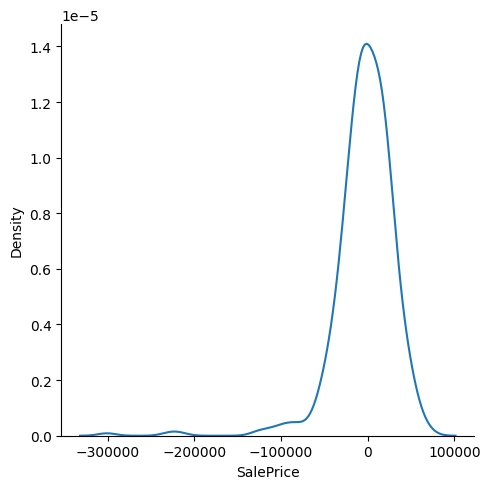

In [ ]:
import seaborn as sns
sns.displot(y_pred-y_test,kind='kde')

In [ ]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
print("R² Score:", score)


R² Score: 0.8216685172595879
